In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/aquaculture_optimal_conditions_dataset.csv")

In [ ]:
data['Total Success Rate'] = (data['Fish Success Rate'] + data['Plant Success Rate']) / 2

In [ ]:
data.drop(['Fish Success Rate','Plant Success Rate'],axis=1 , inplace= True )

In [ ]:
fish_dict = {
    'Tilapia': 1,
    'Trout': 2,
    'Perch': 3}
data['Fish Species']=data['Fish Species'].map(fish_dict)

In [ ]:
plant_dict = {
    'Basil': 1,
    'Tomatoes': 2,
    'Lettuce': 3}
data['Pairable Plant Species']=data['Pairable Plant Species'].map(plant_dict)

In [ ]:
threshold = 0.75

# Create a new column 'Success Class' based on the threshold
data['Success Class'] = data['Total Success Rate'].apply(lambda x: 'Yes' if x > threshold else 'No')



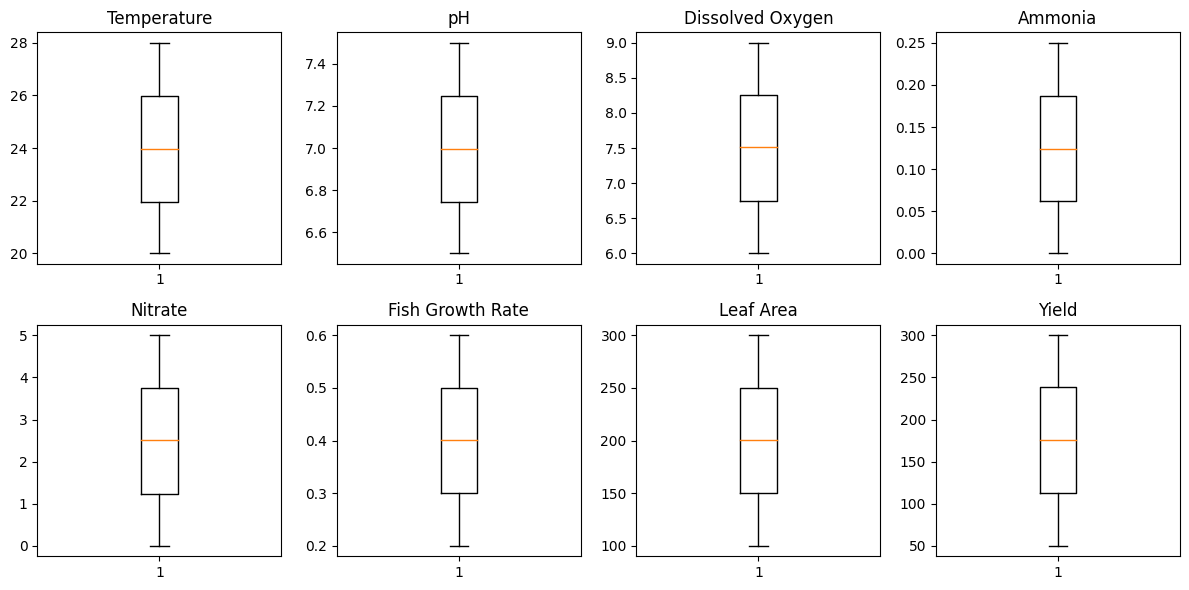

In [ ]:
import matplotlib.pyplot as plt
numerical_columns = ['Temperature', 'pH', 'Dissolved Oxygen', 'Ammonia', 'Nitrate', 'Fish Growth Rate', 'Leaf Area', 'Yield']

# Detect outliers using Tukey's method
outliers = {}
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Plotting boxplots to visualize outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 4, i)
    plt.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Displaying detected outliers
for column, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers in {column}:")
        print(outlier_df)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming df is your DataFrame containing the dataset
# Selecting features and target
X = data.drop(['Total Success Rate', 'Success Class'], axis=1)  # Features
Y = data['Success Class']  # Target

# Example: Encoding categorical variables (assuming 'Fish Behavior', 'Growth Stage', 'Fish Species', 'Pairable Plant Species' are categorical)
label_encoder = LabelEncoder()
X['Fish Behavior'] = label_encoder.fit_transform(X['Fish Behavior'])
X['Growth Stage'] = label_encoder.fit_transform(X['Growth Stage'])
X['Fish Species'] = label_encoder.fit_transform(X['Fish Species'])
X['Pairable Plant Species'] = label_encoder.fit_transform(X['Pairable Plant Species'])

# Example: Scaling numerical features (assuming 'Temperature', 'pH', 'Dissolved Oxygen', 'Ammonia', 'Nitrate', 'Fish Growth Rate', 'Leaf Area', 'Yield' are numerical)
scaler = StandardScaler()
numerical_columns = ['Temperature', 'pH', 'Dissolved Oxygen', 'Ammonia', 'Nitrate', 'Fish Growth Rate', 'Leaf Area', 'Yield']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Now X contains the preprocessed features ready for machine learning
print(X.head())


   Temperature        pH  Dissolved Oxygen   Ammonia   Nitrate  Fish Behavior  \
0     0.180788  0.868647         -0.375256  0.904085 -0.452916              1   
1     0.755308 -1.081522         -1.588874  0.017733 -1.000624              2   
2     0.367085 -0.364641          1.461085 -1.117317 -0.079588              1   
3     0.167216 -1.571077         -0.326638  1.162926 -1.448318              0   
4    -0.251403 -1.659691          1.533627  0.064714 -0.909299              1   

   Fish Growth Rate  Growth Stage  Leaf Area     Yield  Fish Species  \
0          0.622307             0   1.700738  0.991303             1   
1          1.369375             3  -0.081466 -0.516727             0   
2          0.794952             1   0.189651  0.545217             0   
3          0.710634             1   1.231222  0.809584             2   
4         -0.980961             2   0.657901  0.590962             1   

   Pairable Plant Species  
0                       2  
1                       

In [ ]:
data=data.drop(['Fish Behavior', 'Growth Stage'],axis=1)

In [ ]:
X = data.drop(['Success Class', 'Total Success Rate'], axis=1)  # Features
Y = data['Success Class']  # Target variable

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9505
Naive Bayes  with accuracy : 0.9505
Support Vector Machine  with accuracy : 0.9505
K-Nearest Neighbors  with accuracy : 0.9495
Decision Tree  with accuracy : 0.8795
Random Forest  with accuracy : 0.9505
Bagging  with accuracy : 0.945
AdaBoost  with accuracy : 0.9505
Gradient Boosting  with accuracy : 0.949
Extra Trees  with accuracy : 0.9045


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, Y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X, Y)

# Evaluate accuracy
accuracy = best_rf_model.score(X, Y)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9589
